<img src="photo_2018-10-31_16-04-39.jpg" height="420" width="420"  />

# 1: Calculation of the elastic compliance from ASTM1820 (A2.10 and A2.11)

$$
C_{LL(i)}= {\frac 1{E\cdot B_e}}\left(\frac {W+a_i}{W-a_i}\right)^2
\left[
2.1630+12.219\left(\frac {a_i}W\right)
-20.065\left(\frac {a_i}W\right)^2
-0.9925\left(\frac {a_i}W\right)^3
+20.609\left(\frac {a_i}W\right)^4
-9.9314\left(\frac {a_i}W\right)^5
\right]
\qquad(A2.10) 
\\
\\
\boldsymbol{where:} \\
B_e = B-\frac{(B-B_N)^2}B \;mm
\qquad\qquad\qquad\qquad\qquad\qquad(A2.11)
\\
\\
$$
___
$$
B = 20 \;mm \\
B_N = 0.2 \cdot\;B \\
E = 190 000 \;MPa = 190 000 \;\frac N {{mm}^2} \\
W = 40\;mm \\
$$

In [36]:
class formula_A2_11:
    B= 20.
    BN= 0.2*B
    Be= B - (B-BN)**2/B
    E= 190000.
    W= 40.
    def Cc(self,ai):
        ai_w=ai/self.W
        return (2.1630 + 12.219*ai_w - 20.065*ai_w**2 - 0.9925*ai_w**3 + 20.609*ai_w**4 - 9.9314*ai_w**5) * \
            ( (self.W+ai)/(self.W-ai) )**2./(self.E*self.Be)
#

formula_A2_11().Cc(0.151550581328749)

1.6394295248661302e-06

In [37]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[18, 11]

In [38]:
crack = np.loadtxt("crack-length_calc1.dat", dtype=np.float)

In [39]:
#crk=[crack[1], A2.11(crack[1]+24.)]

A2_11=formula_A2_11()
crk=[]
for xx in crack:
    if xx[1]:
        crk.append([xx[1], A2_11.Cc(xx[1]+24.)])
crkk=np.asarray(crk)

#crkk_interp интерполятор массива crkk
crkk_interp = interp1d(crkk[:,0],crkk[:,1], bounds_error=False)
crkk_interp(crkk[:,0][0]).item(), crkk_interp(crkk[:,0][-1]).item(), crkk[:,0].size

(4.730253224460574e-05, 5.940802597708455e-05, 327)

# 1a: creation of the plot $\vartriangle$ a vs. calculated compliance (Cc)

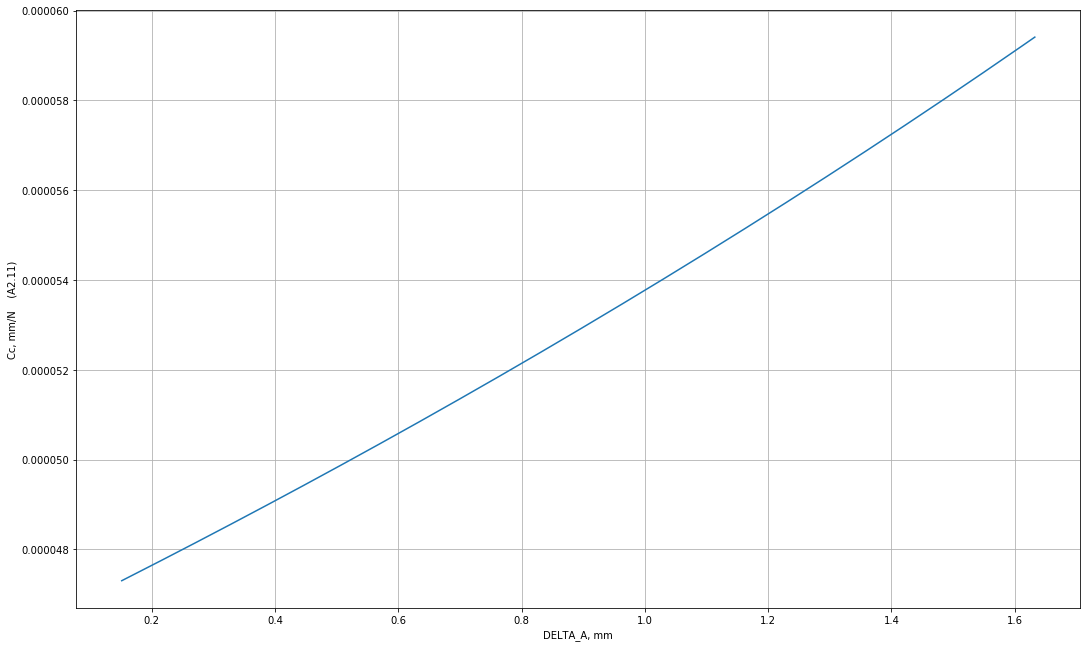

In [40]:
##TEST
plt.rcParams["figure.figsize"]=[18, 11]
plt.plot(crkk[:,0],crkk[:,1])
plt.xlabel('DELTA_A, mm')
plt.ylabel('Cc, mm/N    (A2.11)')
plt.grid()
plt.show()

In [41]:
##TEST
print ("Min","Max","Size","Step")
print (crkk[:,0][0], crkk[:,0][-1], crkk[:,0].size, (crkk[:,0][-1]- crkk[:,0][0])/crkk[:,0].size)
print
test__X = np.arange(crkk[:,0][0], crkk[:,0][-1], (crkk[:,0][-1]- crkk[:,0][0])/crkk[:,0].size)
for _ in test__X:
    print [_, crkk_interp(_).item()]

('Min', 'Max', 'Size', 'Step')
(0.15155058132874899, 1.6326232910700931, 327, 0.0045292743417166487)

[0.15155058132874899, 4.730253224460574e-05]
[0.15607985567046564, 4.733419250316968e-05]
[0.1606091300121823, 4.736585276173362e-05]
[0.16513840435389895, 4.7397513020297556e-05]
[0.16966767869561561, 4.742924388453001e-05]
[0.17419695303733226, 4.7460999665012806e-05]
[0.17872622737904892, 4.749275544549561e-05]
[0.18325550172076557, 4.752454802676447e-05]
[0.18778477606248223, 4.75564041853492e-05]
[0.19231405040419888, 4.758826034393393e-05]
[0.19684332474591554, 4.762011650251866e-05]
[0.20137259908763219, 4.7652055056053985e-05]
[0.20590187342934885, 4.768401875225564e-05]
[0.2104311477710655, 4.771598244845729e-05]
[0.21496042211278216, 4.774794913886297e-05]
[0.21948969645449881, 4.778001892115752e-05]
[0.22401897079621547, 4.781209565715976e-05]
[0.22854824513793212, 4.7844172393162e-05]
[0.23307751947964878, 4.787626185811082e-05]
[0.23760679382136543, 4.790845119008417e-05]


In [42]:
force = np.loadtxt("FORCE_CMOD_calc1.dat", dtype=np.float)
force

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e-03,   1.73770000e-03,   1.16225000e+01],
       [  2.00000000e-03,   3.47545000e-03,   2.32385000e+01],
       ..., 
       [  9.98000000e-01,   1.97705000e+00,   1.57314000e+03],
       [  9.99000000e-01,   1.97910000e+00,   1.57241000e+03],
       [  1.00000000e+00,   1.98115000e+00,   1.57164000e+03]])

In [43]:
force[:,1]*=2.0
force[:,2]*=2.0
force

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e-03,   3.47540000e-03,   2.32450000e+01],
       [  2.00000000e-03,   6.95090000e-03,   4.64770000e+01],
       ..., 
       [  9.98000000e-01,   3.95410000e+00,   3.14628000e+03],
       [  9.99000000e-01,   3.95820000e+00,   3.14482000e+03],
       [  1.00000000e+00,   3.96230000e+00,   3.14328000e+03]])

In [44]:
#force_interp интерполятор массива force
force_interp = interp1d(force[:,1],force[:,2], bounds_error=False)
force_interp

# 1b: creation of the plot F vs. CMOD from Code_Aster simulation

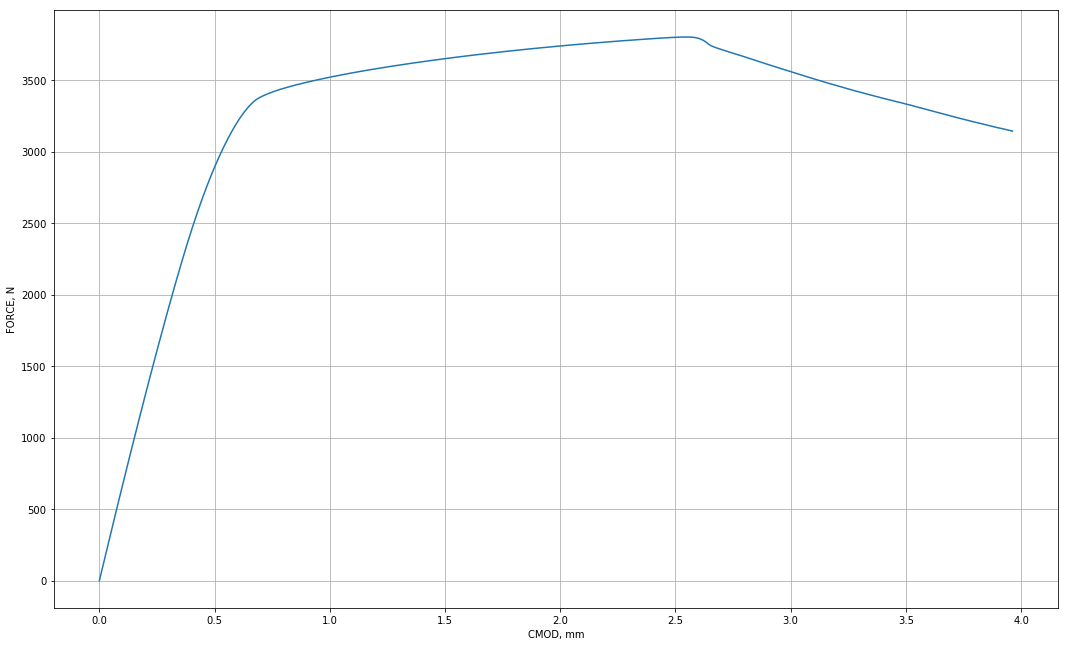

array([    0.        ,  2891.19466667,  3520.07412237,  3649.79298053,
        3738.50718051,  3799.0580198 ,  3559.25492683,  3332.55560976])

In [45]:
##TEST
#INST CMOD FORCE
plt.plot(force[:,1], force[:,2])
plt.xlabel('CMOD, mm')
plt.ylabel('FORCE, N')
plt.grid()
plt.show()
force_interp([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

In [46]:
##TEST
print ("Min","Max","Size","Step")
print (force[:,1][0], force[:,1][-1], force[:,1].size, (force[:,1][-1]- force[:,1][0])/force[:,1].size)
print
test__X = np.arange(force[:,1][0], force[:,1][-1], (force[:,1][-1]- force[:,1][0])/force[:,1].size)
for _ in test__X:
    print [_, force_interp(_).item()]

('Min', 'Max', 'Size', 'Step')
(0.0, 3.9622999999999999, 1001, 0.0039583416583416579)

[0.0, 0.0]
[0.0039583416583416579, 26.47322632904428]
[0.0079166833166833157, 52.93000512531696]
[0.011875024975024974, 79.3787001268759]
[0.015833366633366631, 105.828900937143]
[0.019791708291708288, 132.2806947552732]
[0.023750049950049947, 158.73449884046556]
[0.027708391608391607, 185.18926244328742]
[0.031666733266733263, 211.64369190121766]
[0.035625074925074919, 238.0816465338826]
[0.039583416583416575, 264.5093546345521]
[0.043541758241758238, 290.9076160696906]
[0.047500099900099894, 317.27960289991773]
[0.051458441558441551, 343.62188781275637]
[0.055416783216783214, 369.9191140762904]
[0.05937512487512487, 396.1775540164271]
[0.063333466533466526, 422.3956479571442]
[0.067291808191808189, 448.579484844717]
[0.071250149850149838, 474.7237379567715]
[0.075208491508491501, 500.825183795192]
[0.07916683316683315, 526.88681433772]
[0.083125174825174813, 552.9091690662278]
[0.087083516483516477

In [47]:
nz= crack[:,1].size-crkk[:,1].size
crack_cmode_interp = interp1d(crack[:,1][nz : ], force[:,1][nz : ], bounds_error=False)
crack_cmode_interp

# 1c: creation of the plot CMOD vs. $\vartriangle$ a 

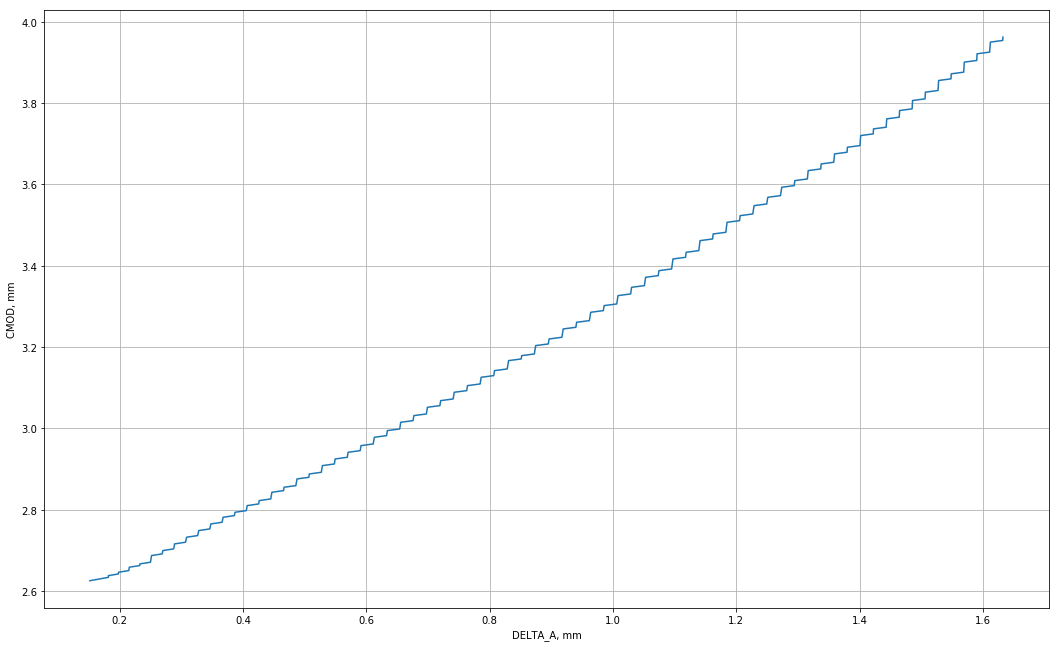

array([ 2.64695228,  2.79689143,  2.95964391,  3.12865373,  3.30495947,
        3.50995139,  3.69547678,  3.92316137])

In [48]:
##TEST
plt.plot(crack[:,1][nz : ], force[:,1][nz : ])
plt.xlabel('DELTA_A, mm')
plt.ylabel('CMOD, mm')
plt.grid()
plt.show()
#
crack_cmode_interp([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6])

In [49]:
def Apl(delta, eps):    
    cc_ = 1./crkk_interp(delta).item()
    cmode_ = crack_cmode_interp(delta).item()
    #force_ = force_interp(cmode_).item()

    x1_ = cmode_
    x2_ = force[:,1][-1]
    while True:
        y2_ = (x2_ - cmode_) * cc_ 
        f2_ = force_interp(x2_).item()
        #print "x1=%r x2=%r y2=%r f2=%r (y-f)=%r" % (x1_, x2_, y2_, f2_, y2_ - f2_)
        if (abs(y2_-f2_) / f2_) < eps: break
        if y2_ > f2_:
            dx_ = 0.5 * (x2_ - x1_)
            x2_= x1_ + dx_
        if y2_ < f2_:
            x1_ = x2_
            dx_ = dx_ * 0.5
            x2_= x1_ + dx_
        y2_ = (x2_ - cmode_) * cc_ 
        f2_ = force_interp(x2_).item()

    from scipy.integrate import quad
    q_ = quad(force_interp, force[:,1][0], x2_)[0] - y2_ * (x2_ - cmode_) * 0.5        

    return (cmode_, x2_, y2_ , q_)

Apl(1.0, 0.00001)

(3.3049594741390784,
 3.4844954046604335,
 3338.9810489846254,
 11197.801334650865)

# 1d: creation of the intersection of calculated compliance (Cc) with Force-CMOD curvea and calculation of the Apl

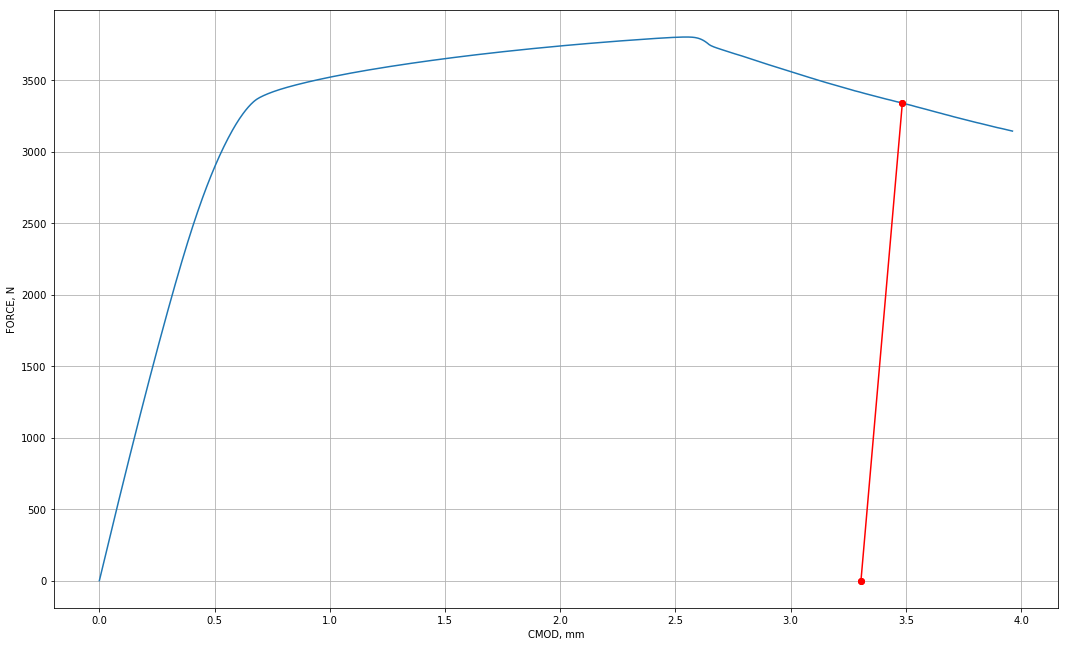

(3.3049594741390784,
 3.4844954046604335,
 3338.9810489846254,
 11197.801334650865)

In [50]:
##TEST jel()
plt.plot(force[:,1], force[:,2])
A_= Apl(1.0, 0.00001)

plt.plot(A_[0], 0.0, 'ro') # first point
plt.plot(A_[1], A_[2], 'ro') # second point
plt.plot([A_[0],A_[1]], [0.0, A_[2]], 'ro-')
"""
"""

plt.xlabel('CMOD, mm')
plt.ylabel('FORCE, N')
plt.grid()
plt.rcParams["figure.figsize"]=[18, 11]
plt.show()
A_

# 2a: Calculation of the Jpl according to the ASTM1820 (basic method)

$$
J_{pl(i)}= 
\frac{\eta_{pl} A_{pl}}{B_N b_0}
\qquad(A2.6) 
\\
\boldsymbol{where:} \\
\eta_{pl}=2+0.522\frac{b_{0}}{W}\\
A_{pl} \Longrightarrow 1d \\
b_0=W-a_0 \\
\\
\\
a_0=24 +\vartriangle a \\
B = 20 \;mm \\
B_N = 0.2 \cdot\;B \\
W = 40\;mm \\
$$ 

In [52]:
class formula_A2_6:
    B= 20.
    BN= 0.2*B
    W= 40.    
    def Jpl(self,ai):
        b_0=self.W-ai
        return (2.+0.522*b_0/self.W)*Apl/(self.BN*b_0)

# 2b: Calculation of the Jpl according to the ASTM1820 (incremental version)

$$
J_{pl(i)}= \left[
J_{pl(i-1)}+
\left(
\frac{\eta_{pl(i-1)}}
{b_{(i-1)}}
\right)
{\frac {A_{pl(i)}-A_{pl(i-1)}}{B_N}}
\right]
\left[
1-\gamma_{(i-1)} 
\left(
\frac{a_{(i)}-a_{(i-1)}}{b_{(i-1)}}
\right)
\right] \qquad(A2.8) 
\\
\boldsymbol{where:} \\
\eta_{pl(i-1)}=2+0.522\frac{b_{(i-1)}}{W}
\\
\gamma_{(i-1)}=1.0+0.76\frac{b_{(i-1)}}{W}
A_{pl} \Longrightarrow 1d \\
b_{(i-1)}=W-a_{(i-1)} \\
$$

$$
B = 20 \;mm \\
B_N = 0.2 \cdot\;B \\
W = 40\;mm \\
a_i=24 +\vartriangle a
$$ 

# 3: Calculation of the Jel according to the ASTM1820


$$
J_{el}= {\frac {K^2 (1-\nu^2)}{E}} \qquad(A2.4)
\\
\boldsymbol{where:} \\
\\
K_i= {\frac {P_i}{(B B_N W)^{1/2}}}f \left(\frac {a_i}W\right) \qquad(A2.2) 
\\
f\left(\frac {a_i}W\right) = \frac {\left(2+\frac {a_i}W \right)
\left[0.886 + 4.64 \left(\frac {a_i}W \right)-13.32\left(\frac {a_i}W \right)^2 + 14.72\left(\frac {a_i}W \right)^3-5.6\left(\frac {a_i}W \right)^4
\right]
}{\left(1-\frac {a_i}W \right)^{3/2}} \qquad(A2.3) \\
E=190 000 MPa
$$ 


In [ ]:
class formula_A2_3:
    E= 190000.
    W= 40.
    def fi(self,ai):
        ai_w=ai/self.W
        return ((2+ai_w)*(0.886 + 4.64*ai_w - 13.32*ai_w**2 + 14.72*ai_w**3 - 5.6*ai_w**4)) * \
             (1-ai_w)**1.5


class formula_A2_2:
    B= 20.
    BN= 0.2*B
    W= 40.
    def Ki(self,ai):
        return (Force * fi /self.B*self.BN*self.W)**0.5


class formula_A2_4:
    E= 190000.
    mu= 0.3.
    def Jel(self,Ki):
        return (Ki*(1-self.mu**2)/self.E)    


# 4: Calculation of the total energy J

$$
J_{total} = J_{pl}+J_{el}
\qquad(A2.5)
$$


   # 5: Creation of the J-R curve

<img src="J_R_curve.png" height="420" width="420"  />

on the J-R curve we plot:

y: $$J_{total}$$
x: $$ \vartriangle a $$